<div style="text-align:center">
<font color='Blue'><h1>Clustering : Part 1</h1></font>
</div>

K-Means is a very popular clustering technique. The K-means clustering is another class of unsupervised learning algorithms used to find out the clusters of data in a given dataset.
In this lab, we will implement the K-Means clustering algorithm from scratch.

The 5 Steps in K-means Clustering Algorithm:

Step 1. Randomly pick k data points as our initial Centroids.

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now assign each data point to the closest centroid according to the distance found.

Step 4. Update centroid location by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till our centroids don’t change.

<font color='Blue'><h1>Implementing the K-Means Clustering Algorithm</h1></font>

Let’s implement the above steps in code now. Import the numpy module and then go through the rest of the code here to get an understanding of how the K-Means clustering is implemented in code.

In [45]:
#Importing required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations, threshold=0.1):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
        old_centroids = centroids
        centroids = np.vstack(centroids) #Updated Centroids 
        
        if abs(old_centroids - centroids).sum() < threshold:
            return points
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    print(idx)
    return points

    # improvement if the centroids dont change

In [18]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [46]:
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)

In [49]:
label

array([5, 2, 2, ..., 2, 5, 7])

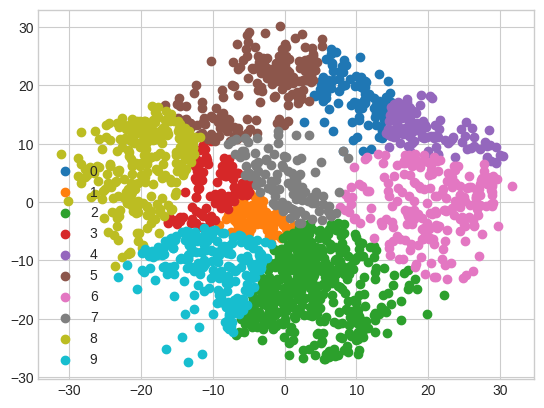

In [47]:
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

<div style="text-align:center">
<font color='Blue'><h1>Clustering : Part 2</h1></font>
</div>

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/tmp/ipykernel_304841/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### K-Means for Color Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.
For example, consider the image shown in the following figure, which is from the Scikit-Learn `datasets` module (for this to work, you'll have to have the `PIL` Python package installed):
(For a color version of this and following images, see the online version of this book).

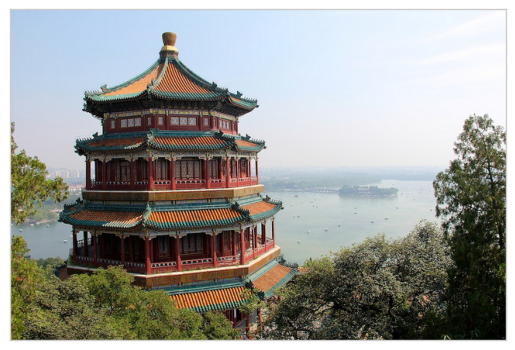

In [22]:
# Note: this requires the PIL package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size `(height, width, RGB)`, containing red/blue/green contributions as integers from 0 to 255:

In [23]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1:

In [27]:
data = china / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency (see the following figure):

In [26]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

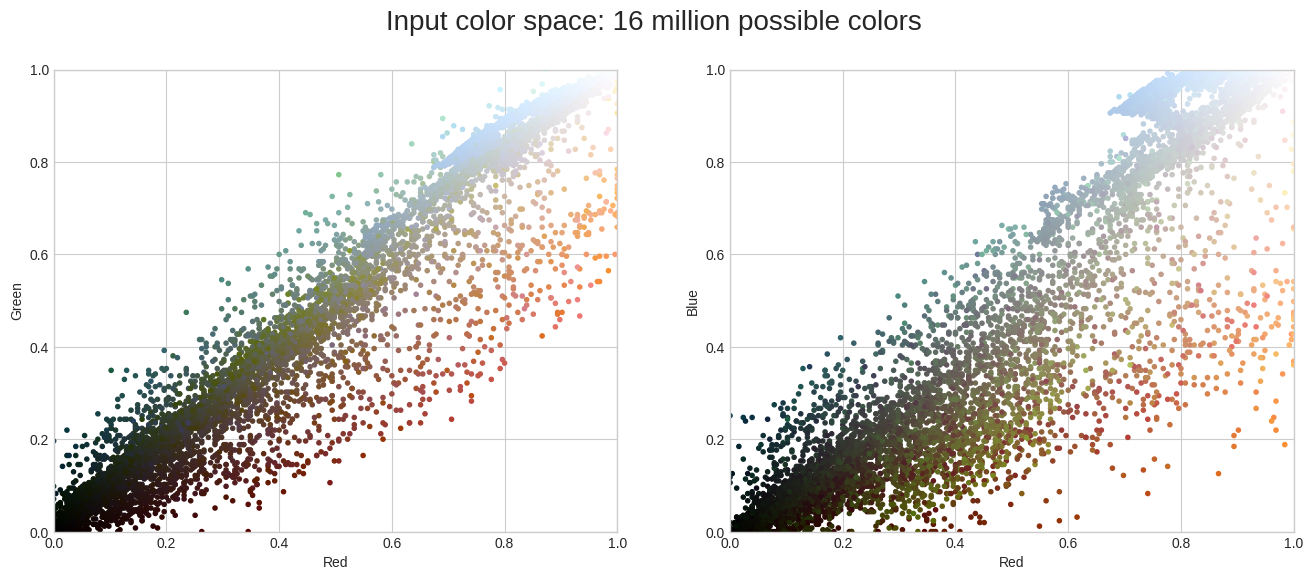

In [28]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini-batch k-means, which operates on subsets of the data to compute the result (shown in the following figure) much more quickly than the standard k-means algorithm:

/home/rayanzak/dev/miniconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


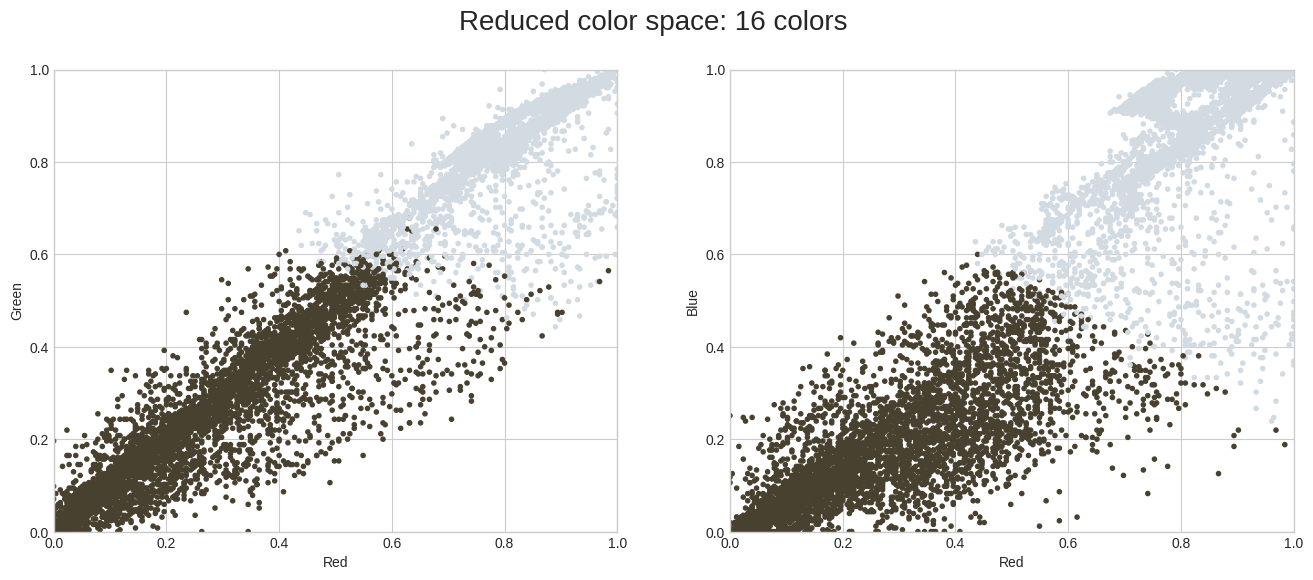

In [32]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this (see the following figure):

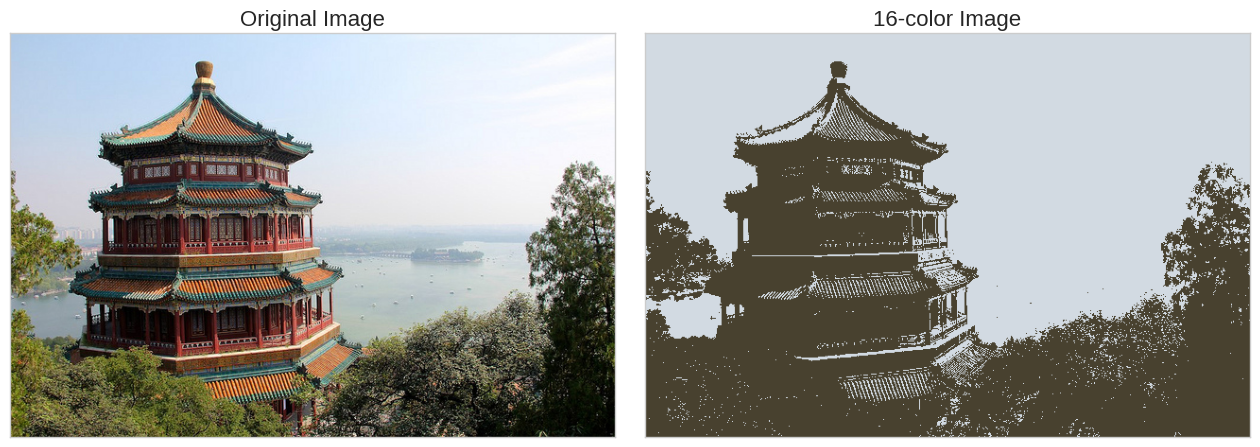

In [33]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

*Some* detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.
In terms of the bytes required to store the raw data, the image on the right achieves a compression factor of around 1 million!
Now, this kind of approach is not going to match the fidelity of purpose-built image compression schemes like JPEG, but the example shows the power of thinking outside of the box with unsupervised methods like *k*-means.